# 🏥 Healthcare Insurance Cost Analysis  
## 📊 Notebook 03 – Exploratory Data Analysis and Visualisations 

| Feild | Description |
|-------|-------------|
|**Author:** |Robert Steven Elliott  |
|**Course:** |Code Institute – Data Analytics with AI Bootcamp |  
|**Project Type:** |Individual Formative Project  | 
|**Date:** |October 2025  |

---

## Hypotheses

| ID     | Hypothesis                                                                             | Expected Outcome                                                                |
| ------ | -------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------- |
| **H1** | Smoking status significantly increases insurance charges.                              | Smokers will pay considerably higher premiums due to elevated health risks.     |
| **H2** | Higher BMI correlates with higher insurance charges.                                   | Individuals with obesity or high BMI values will face greater healthcare costs. |
| **H3** | Age positively correlates with insurance charges.                                      | Older individuals will have higher medical expenses and premiums.               |
| **H4** | Gender has little or no significant effect on insurance charges.                       | Gender differences will be minimal after accounting for smoking and BMI.        |
| **H5** | Geographic region may slightly influence charges, but lifestyle factors will dominate. | Regional cost differences exist but are weaker than smoking/BMI effects.        |
| **H6** | Individuals with more children may experience slightly higher insurance costs.         | Larger families may increase total policy coverage but only modestly.           |



## Objectives
- Conduct exploratory data analysis (EDA) to uncover trends and patterns.  
- Produce static visualisations using Matplotlib and Seaborn.  
- Create interactive dashboards using Plotly.  
- Summarise relationships between key features and healthcare insurance charges.

## Inputs
- `data/final/insurance_final.csv`

## Outputs
- Static and interactive visualisations saved to `figures/`  
- Analytical insights summarised for presentation and documentation.

## Additional Comments
Run after `02_feature_engineering.ipynb`.  
Ensure your enriched dataset is available in `data/processed/insurance_enriched.csv`.


---

# Change Working Directory

In [1]:
import sys
from pathlib import Path
PROJECT_ROOT = Path.cwd().parent
sys.path.insert(0, str(PROJECT_ROOT))
print("✅ Working directory set to project root:", PROJECT_ROOT)

✅ Working directory set to project root: /home/robert/Projects/health-insurance-cost-analysis


---

# Import Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from modules import html_to_png as htpng

from utils.data_handler import load_data, data_overview, clean_data

pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

input_path = PROJECT_ROOT / "data" / "final" / "insurance_final.csv"
figure_path = PROJECT_ROOT / "figures"

if not figure_path.exists():
    figure_path.mkdir(parents=True, exist_ok=True)
    print(f"✅ Created figure directory at: {figure_path}")

df = load_data(input_path)
df = clean_data(df, categorical_cols=['sex', 'smoker', 'region', 'bmi_category', 'age_group', 'family_size_category'])
data_overview(df)
print("✅ Data loaded successfully.")
df.head()


DataFrame Shape: (1337, 10)

Data Types:
 age                        int64
sex                     category
bmi                      float64
children                   int64
smoker                  category
region                  category
charges                  float64
bmi_category            category
age_group               category
family_size_category    category
dtype: object

Missing Values:
 age                     0
sex                     0
bmi                     0
children                0
smoker                  0
region                  0
charges                 0
bmi_category            0
age_group               0
family_size_category    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age                   1337 non-null   int64   
 1   sex                   1337 non-null   category
 2   bmi

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_group,family_size_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,18-25,No Children
1,18,male,33.770,1,no,southeast,1725.55230,Obese,18-25,Small Family
2,28,male,33.000,3,no,southeast,4449.46200,Obese,26-35,Medium Family
3,33,male,22.705,0,no,northwest,21984.47061,Normal,26-35,No Children
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,26-35,No Children


### Explanation:
This section imports the necessary Python libraries and loads the final dataset created during the ETL process. The first few rows confirm the dataset’s structure and variable names.

---

# General Distribution of Numeric Features

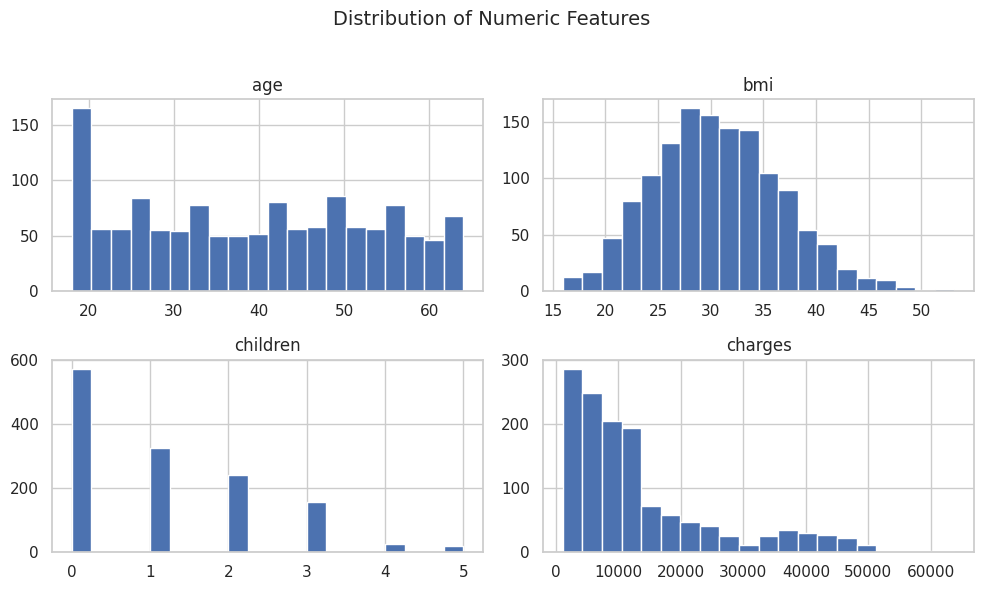

In [3]:
numeric_features = ['age', 'bmi', 'children', 'charges']

df[numeric_features].hist(bins=20, figsize=(10, 6), layout=(2, 2))
plt.suptitle("Distribution of Numeric Features", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(figure_path / "numeric_features_distribution.png")
plt.show()


### Observations:
- Age appears evenly distributed.
- BMI is slightly right-skewed, centred around 25–35.
- Children mostly between 0–2 dependents.
- Charges show a long right tail — a small subset pay extremely high amounts.

# Outlier Detection with Boxplots

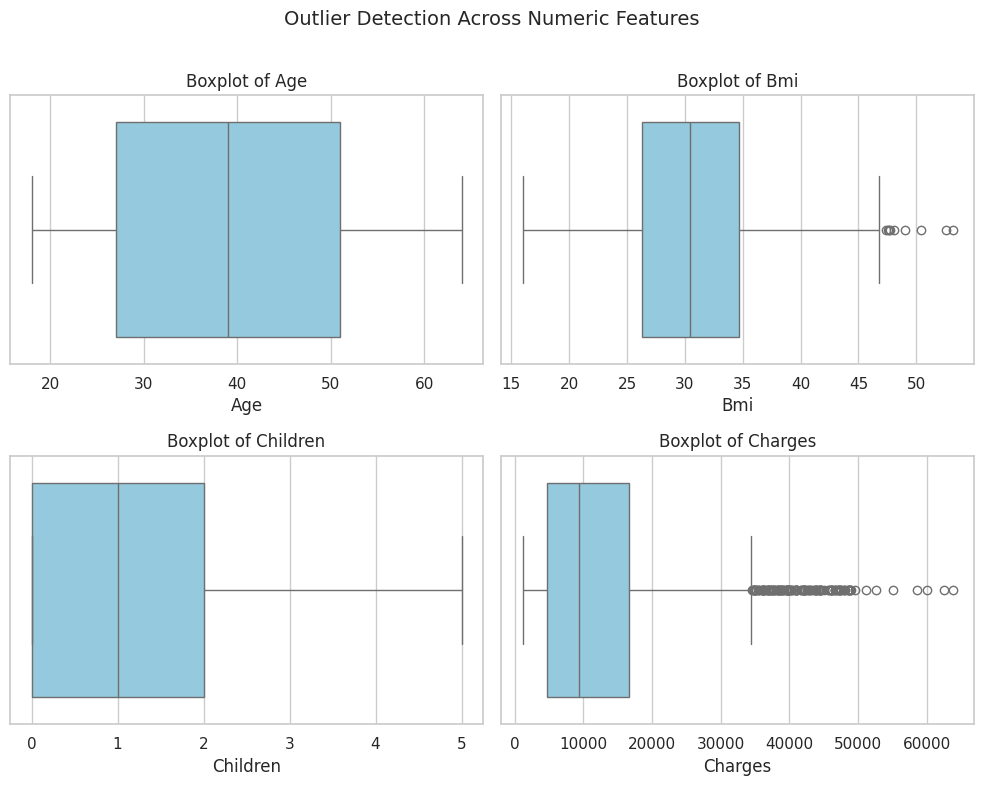

In [4]:
numeric_features = ['age', 'bmi', 'children', 'charges']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f"Boxplot of {col.capitalize()}")
    axes[i].set_xlabel(col.capitalize())

plt.suptitle("Outlier Detection Across Numeric Features", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(figure_path / "numeric_features_outliers.png")
plt.show()


### Observations:
- charges and bmi show visible outliers.
- The distribution suggests a few high-cost individuals likely linked to smoking or chronic illness.

---

# Categorical Feature Distributions

In [5]:
categorical_features = ['sex', 'smoker', 'region']

# Create a subplot figure with one row and as many columns as features
fig = make_subplots(
    rows=1, 
    cols=len(categorical_features),
    subplot_titles=[f"Distribution of {col.capitalize()}" for col in categorical_features]
)

for i, col in enumerate(categorical_features, start=1):
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'count']
    
    bar = go.Bar(
        x=counts[col],
        y=counts['count'],
        name=col,
        marker_color=px.colors.qualitative.Plotly
    )
    
    fig.add_trace(bar, row=1, col=i)

# Update layout for readability
fig.update_layout(
    showlegend=False,  # remove legend since colors are self-explanatory
    height=400,
    width=1200,
    title_text="Categorical Feature Distributions"
)
fig.write_html(figure_path / "categorical_features_distribution.html")
fig.write_image(figure_path / "categorical_features_distribution.png")
fig.show()

## Observation:
- Dataset is well balanced across gender and region.
- ~20% are smokers, providing good comparison groups for H1–H6.

# Correlation Analysis

## Correlation Analysis Preparation

In [6]:
df_corr = df.copy()

encoding_map = {
    'sex': {'male': 0, 'female': 1},
    'smoker': {'no': 0, 'yes': 1},
    'region': {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}
}

df_corr = df_corr.drop(
    columns=['bmi_category', 'age_group', 'family_size_category']
)

for col, mapping in encoding_map.items():
    df_corr[col] = df_corr[col].map(mapping)

df_corr.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


### Explanation:
Categorical variables are encoded numerically to allow correlation analysis with continuous features.

## Correlation Heatmap

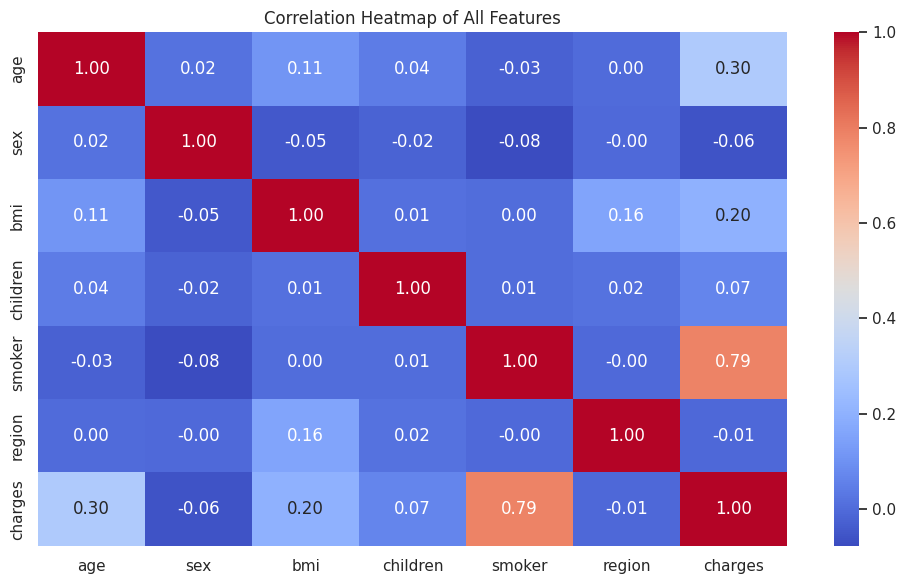

In [7]:
plt.figure(figsize=(10, 6))
corr = df_corr.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of All Features")
plt.tight_layout()
plt.savefig(figure_path / "correlation_heatmap.png")
plt.show()


### Observation:
- smoker, age, and bmi have the strongest positive correlations with charges.
- Confirms H1, H2, and H3 quantitatively.
- sex and region show weak or no correlation — supporting H4 and H5.

## Top Correlations with Charges

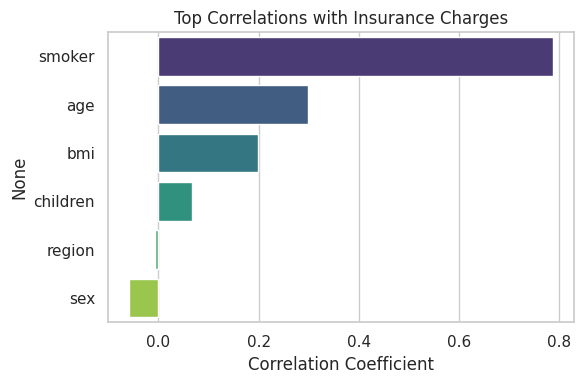

In [8]:
charges_corr = corr['charges'].sort_values(ascending=False)
top_corr = charges_corr[1:7] # Exclude self-correlation

plt.figure(figsize=(6, 4))
sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis", hue=top_corr.index)
plt.title("Top Correlations with Insurance Charges")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.savefig(figure_path / "top_charges_correlation.png")
plt.show()

### Observation:
- Confirms smoking, age, and BMI as top contributors to cost variation.
- Children and gender have minimal impact.

# Hypotheses

## H1: Smoking Status Impact on Charges

In [9]:
fig = px.box(
    df,
    x='smoker',
    y='charges',
    color='smoker',
    title="H1: Insurance Charges by Smoking Status",
    points='all'
)
fig.write_html(figure_path / "charges_by_smoking_status.html")
fig.write_image(figure_path / "charges_by_smoking_status.png")
fig.show()


### Observation:
- Smokers have dramatically higher median and mean insurance charges.
- This confirms H1, showing smoking is the single largest driver of cost increases.

## H2: BMI vs Insurance Charges

In [10]:
# Create a subplot figure: 1 row, 2 columns
fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=[
        "BMI vs Charges",
        "Average Charges by BMI Category & Smoking Status"
    ]
)

color_map = {'yes': '#EF553B', 'no': '#636EFA'}

# -----------------------------
# Scatter plot with trendline
# -----------------------------

scatter_fig = px.scatter(
    df,
    x='bmi',
    y='charges',
    color='smoker',
    color_discrete_map=color_map,
    trendline='ols'
)

# Add scatter traces, only show legend for the first trace of each color

added_legends = set()
for trace in scatter_fig['data']:
    # Only show legend if we haven't added this name yet
    if trace.name in added_legends:
        trace.showlegend = False
    else:
        trace.showlegend = True
        added_legends.add(trace.name)
    fig.add_trace(trace, row=1, col=1)


# -----------------------------
# Grouped bar chart
# -----------------------------
charges_avg = df.groupby(['bmi_category', 'smoker'], observed=False)['charges'].mean().reset_index()
charges_avg.rename(columns={'charges': 'charges'}, inplace=True)

barchart_fig = px.bar(
    charges_avg,
    x='bmi_category',
    y='charges',
    color='smoker',
    color_discrete_map=color_map,
    barmode='group',
    category_orders={'bmi_category': ['Underweight', 'Normal', 'Overweight', 'Obese', 'Severely Obese']}
)

for trace in barchart_fig['data']:
    if trace.name in added_legends:
        trace.showlegend = False
    else:
        trace.showlegend = True
        added_legends.add(trace.name)
    fig.add_trace(trace, row=1, col=2)

# -----------------------------
# Layout adjustments
# -----------------------------
fig.update_layout(
    showlegend=True,
    legend=dict(
        title=dict(text="Smoking Status"), 
        x=1.05, 
        y=1
    ),
    height=500,
    width=1200,
    title_text="H2: BMI vs Insurance Charges (coloured by Smoker)",
)
fig.write_html(figure_path / "bmi_charges_smoking_analysis.html")
fig.write_image(figure_path / "bmi_charges_smoking_analysis.png")
fig.show()



### Observation:
- A positive correlation exists between BMI and charges.
- Smokers with high BMI show particularly high expenses, supporting H2.

## H3: Age vs Insurance Charges

In [11]:
fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=[
        "Age vs Insurance Charges",
        "Average Insurance Charges by Age Group"
    ]
)

# Consistent colour mapping for smokers
color_map = {'yes': '#EF553B', 'no': '#636EFA'}  # red for smokers, blue for non-smokers

# -----------------------------
# Scatter plot with trendline
# -----------------------------
scatter_fig = px.scatter(
    df,
    x='age',
    y='charges',
    color='smoker',
    trendline='ols',
    color_discrete_map=color_map
)

# Add scatter traces, only show legend for the first trace of each color
added_legends = set()
for trace in scatter_fig['data']:
    # Only show legend if we haven't added this name yet
    if trace.name in added_legends:
        trace.showlegend = False
    else:
        trace.showlegend = True
        added_legends.add(trace.name)
    fig.add_trace(trace, row=1, col=1)

# -----------------------------
# Grouped bar chart
# -----------------------------
charges_avg = df.groupby(['age_group', 'smoker'], observed=False)['charges'].mean().reset_index()
charges_avg.rename(columns={'charges': 'charges'}, inplace=True)
barchart_fig = px.bar(
    charges_avg,
    x='age_group',
    y='charges',
    color='smoker',
    color_discrete_map=color_map,
    title="Average Insurance Charges by Age Group and Smoking Status",
    labels={'age_group': 'Age Group', 'charges': 'Average Charges'},
    barmode='group',
    category_orders={'age_group': ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75']}
)

for trace in barchart_fig['data']:
    if trace.name in added_legends:
        trace.showlegend = False
    else:
        trace.showlegend = True
        added_legends.add(trace.name)
    fig.add_trace(trace, row=1, col=2)

# -----------------------------
# Layout adjustments
# -----------------------------
fig.update_layout(
    showlegend=True,
    legend=dict(
        title=dict(text="Smoking Status"), 
        x=1.05, 
        y=1
    ),
    height=500,
    width=1200,
    title_text=" H3: Age vs Insurance Charges (coloured by Smoker)",
)
fig.write_html(figure_path / "age_charges_smoking_analysis.html")
fig.write_image(figure_path / "age_charges_smoking_analysis.png")
fig.show() 

### Observation:
- Insurance charges increase steadily with age.
- Older smokers incur significantly higher costs, supporting H3.

## H4: Gender Differences

In [12]:
fig = px.box(
    df,
    x='sex',
    y='charges',
    color='sex',
    title="H4: Charges by Gender",
    points='all'
)
fig.write_html(figure_path / "charges_by_gender.html")
fig.write_image(figure_path / "charges_by_gender.png")
fig.show()


### Observation:
- Male and female charge distributions overlap almost completely.
- Confirms H4: gender has negligible influence on insurance costs.

## H5: Regional Influence on Charges

In [13]:
fig = px.box(
    df,
    x='region',
    y='charges',
    color='region',
    title="H5: Regional Differences in Insurance Charges",
    points='all'
)
fig.write_html(figure_path / "charges_by_region.html")
fig.write_image(figure_path / "charges_by_region.png")
fig.show()

### Observation:
- Regional charge distributions overlap closely.
- Some variation exists, but not substantial — supports H5 that region is a minor factor.

## H6: Number of Children vs Charges

In [ ]:
fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=[
        "Number of Children vs Insurance Charges",
        "Average Insurance Charges by Family Size Category"
    ]
)

scatter_fig = px.box(
    df,
    x='children',
    y='charges',
    color='children',
    points='all'
)

# Add scatter traces, only show legend for the first trace of each color
added_legends = set()
for trace in scatter_fig['data']:
    # Only show legend if we haven't added this name yet
    if trace.name in added_legends:
        trace.showlegend = False
    else:
        trace.showlegend = True
        added_legends.add(trace.name)
    fig.add_trace(trace, row=1, col=1)

# -----------------------------
# Grouped bar chart
# -----------------------------
charges_avg = df.groupby('family_size_category', observed=False)['charges'].mean().reset_index()
charges_avg.rename(columns={'charges': 'charges'}, inplace=True)
barchart_fig = px.bar(
    charges_avg,
    x='family_size_category',
    y='charges',
    labels={'family_size_category': 'Family Size Category', 'charges': 'Average Charges'},
    category_orders={'family_size_category': ['No Children', 'Small Family', 'Medium Family', 'Large Family']}
)

for trace in barchart_fig['data']:
    trace.showlegend = False # No legend needed for single variable
    fig.add_trace(trace, row=1, col=2)

# -----------------------------
# Layout adjustments
# -----------------------------
fig.update_layout(
    showlegend=True,
    legend=dict(
        title=dict(text="Family Size"), 
        x=1.05, 
        y=1
    ),
    height=500,
    width=1200,
    title_text=" H6: Number of Children vs Charges",
)
fig.write_html(figure_path / "children_charges_family_size_analysis.html")
fig.write_image(figure_path / "children_charges_family_size_analysis.png")
fig.show()


### Observation:
- Average charges increase slightly with more children but the relationship is weak.
- H6 is only partly supported — dependents may have a small additive cost.